# Project of Data Science in pratice

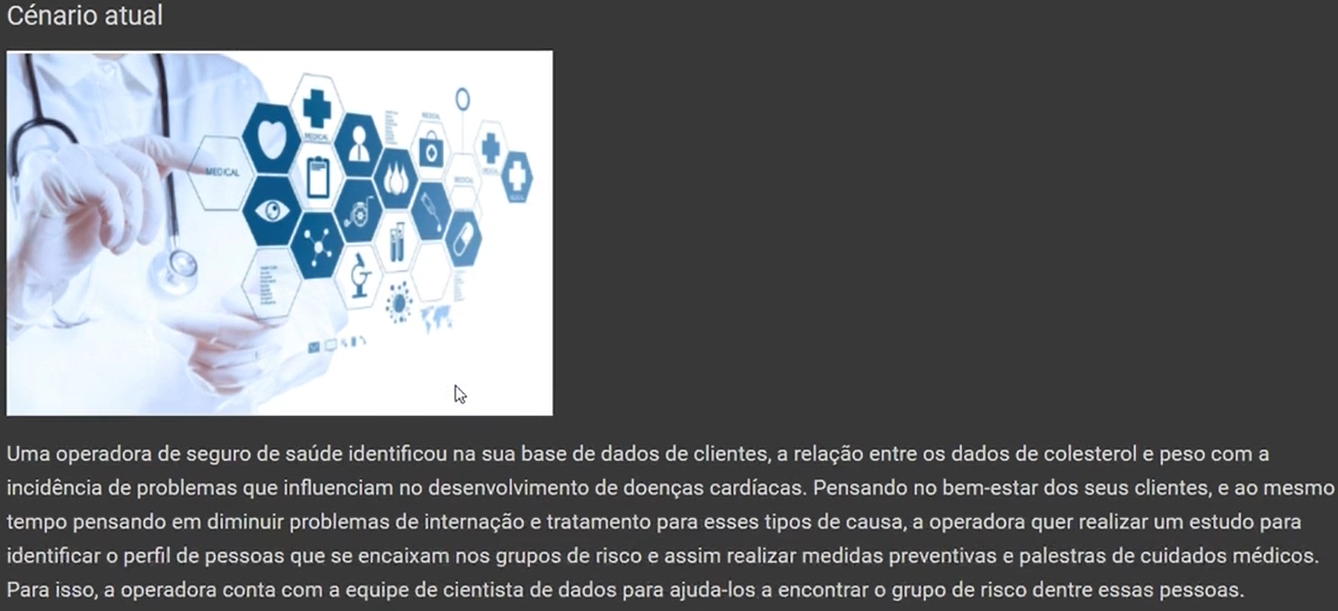

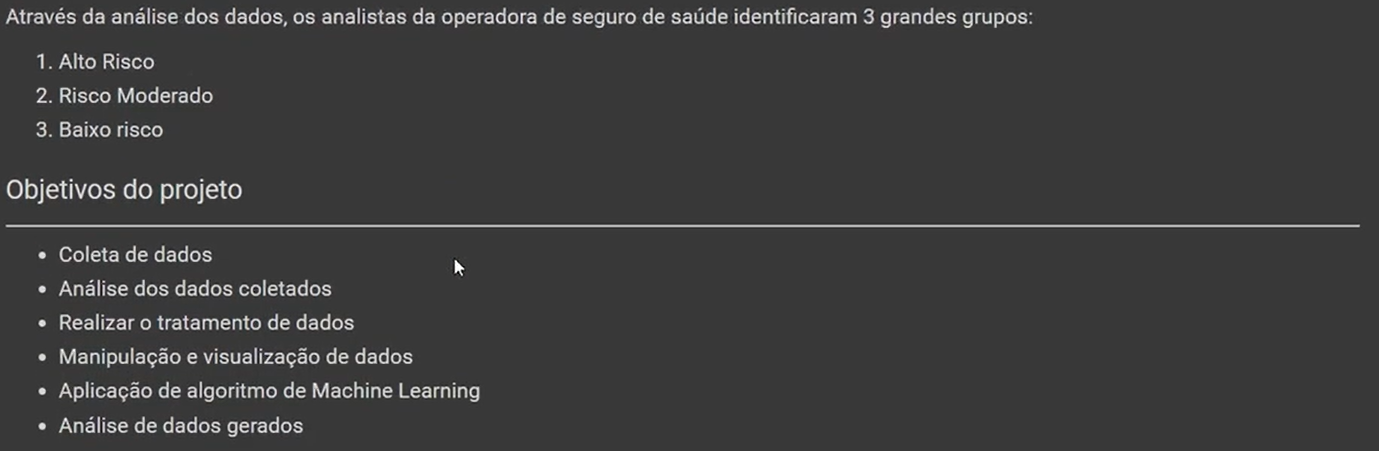

**TL;DR : Make the relationship between weight and cholesterol to identify the risk of heart disease, separating the result into 3 groups.**

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

### Checking library versions

In [3]:
import sklearn
import plotly

print(f'''Checking library versions:\n
pandas: {pd.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}
''')

Checking library versions:

pandas: 1.5.3
sklearn: 1.2.2
plotly: 5.13.1



## Colecting Data

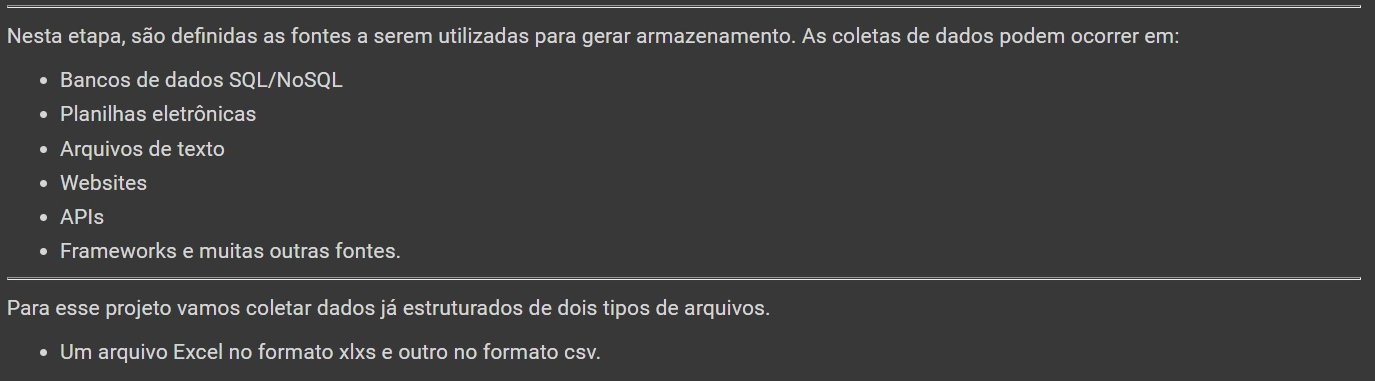

**TL;DR: Ways to colect data.**

In [5]:
# Collecting states data
states = pd.read_csv('/content/estados_br.csv', sep=";", encoding='latin-1')
states.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


In [6]:
# Collecting clients information data
clients = pd.read_excel('/content/clientes_operadora_saude.xlsx')
clients.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [7]:
# Collecting clients age data
ages = pd.read_csv('/content/idade_clientes.csv', sep=';')
ages.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


## Analyzing the collected data

We're going to analyze the collected data to identify possibles errors and inconsistencies.

In [14]:
# Info of clients base
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [9]:
# Describe clients base
clients.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [10]:
# Info of state base
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [11]:
# Describe states base
states.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [12]:
# Info ages base
ages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [13]:
#Describe ages base
ages.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Analyzing missing data

In [15]:
clients.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [16]:
states.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [17]:
ages.isna().sum()

id_cliente    0
idade         0
dtype: int64

### Viewing missing data

In [18]:
clients.loc[clients['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
32,33,NaN,188,Masculino,22
41,42,NaN,177,Masculino,20
87,88,NaN,168,Feminino,12


## Processing of collected data
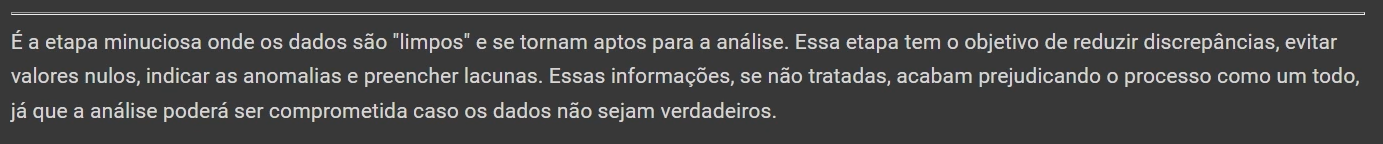

### Missing data

We identified 3 missing values in the customer database. For this case, we have 3 options for processing numerical data.
1. Deleting records.
2. Mean of customer weights: calculates the mean of weights. It is strongly influenced by the presence of extreme values;
3. Median of customer weights: performs the median of weights.


### Deleting data

When there are few null data (statistically) compared to the total and it is not possible to fix them.

In [ ]:
# Deleting clients null data
clients.dropna(subset=['peso'], inplace=True)

In [ ]:
clients.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clients.count()

id_cliente    225
peso          222
colesterol    225
genero        225
id_estado     225
dtype: int64

### Correcting missing data by other measures (mean/median)

In [19]:
clients.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [20]:
mean = clients.peso.mean()

In [21]:
median = clients['peso'].median()

In [22]:
print(f'The value of mean is: {mean}.\nThe value of median is: {median}')

The value of mean is: 142.3153153153153.
The value of median is: 138.5


In [23]:
round(mean,2)

142.32

In [24]:
# Fill in missing values by mean
clients.peso.fillna(round(mean,2), inplace=True)

In [25]:
clients.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [26]:
clients.count()

id_cliente    225
peso          225
colesterol    225
genero        225
id_estado     225
dtype: int64

### Missing data for categorical variable
When we have a variable of categorical type, one approach is to replace the missing value with the most frequently found variable in the data set.

In [27]:
states.pais.value_counts()

Brasil    22
Name: pais, dtype: int64

In [28]:
correction_category = states.pais.mode()[0]
print(correction_category)
# mode = moda

Brasil


In [29]:
states.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [30]:
# correcting data based in mode
states.pais.fillna(correction_category, inplace=True)

In [31]:
states.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

## Data manipulation and visualization

<Axes: title={'center': 'Clients Weight'}, xlabel='peso', ylabel='Count'>

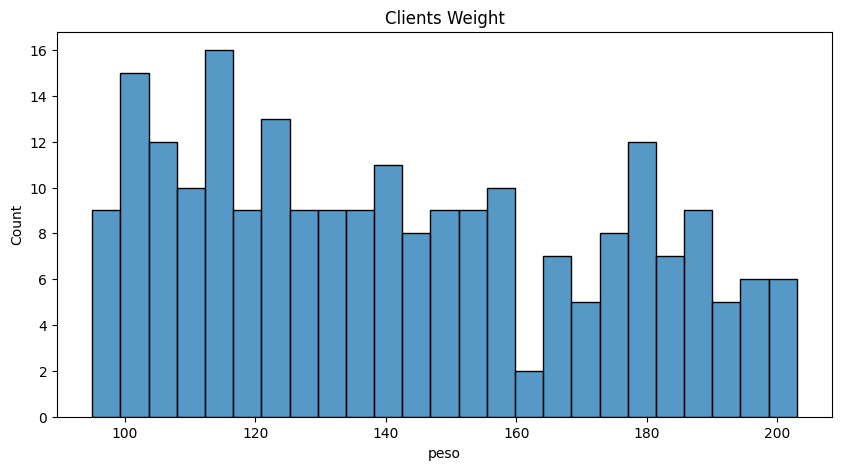

In [33]:
#Creating histogram based on clients weight
plt.figure(figsize=(10,5))
plt.title('Clients Weight')
sns.histplot(clients.peso, bins=25)

<Axes: title={'center': 'Clients cholesterol'}, xlabel='colesterol', ylabel='Count'>

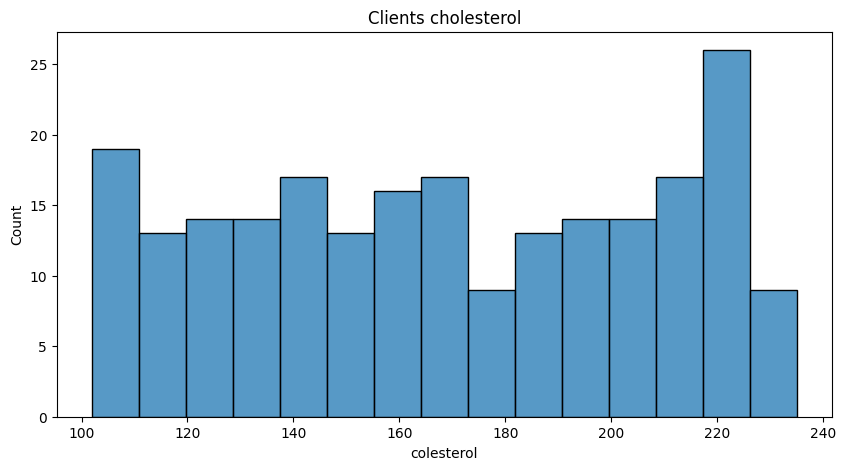

In [34]:
#Creating histogram based on clients' cholesterol
plt.figure(figsize=(10,5))
plt.title('Clients cholesterol')
sns.histplot(clients.colesterol, bins=15)

### Creating boxplot graph
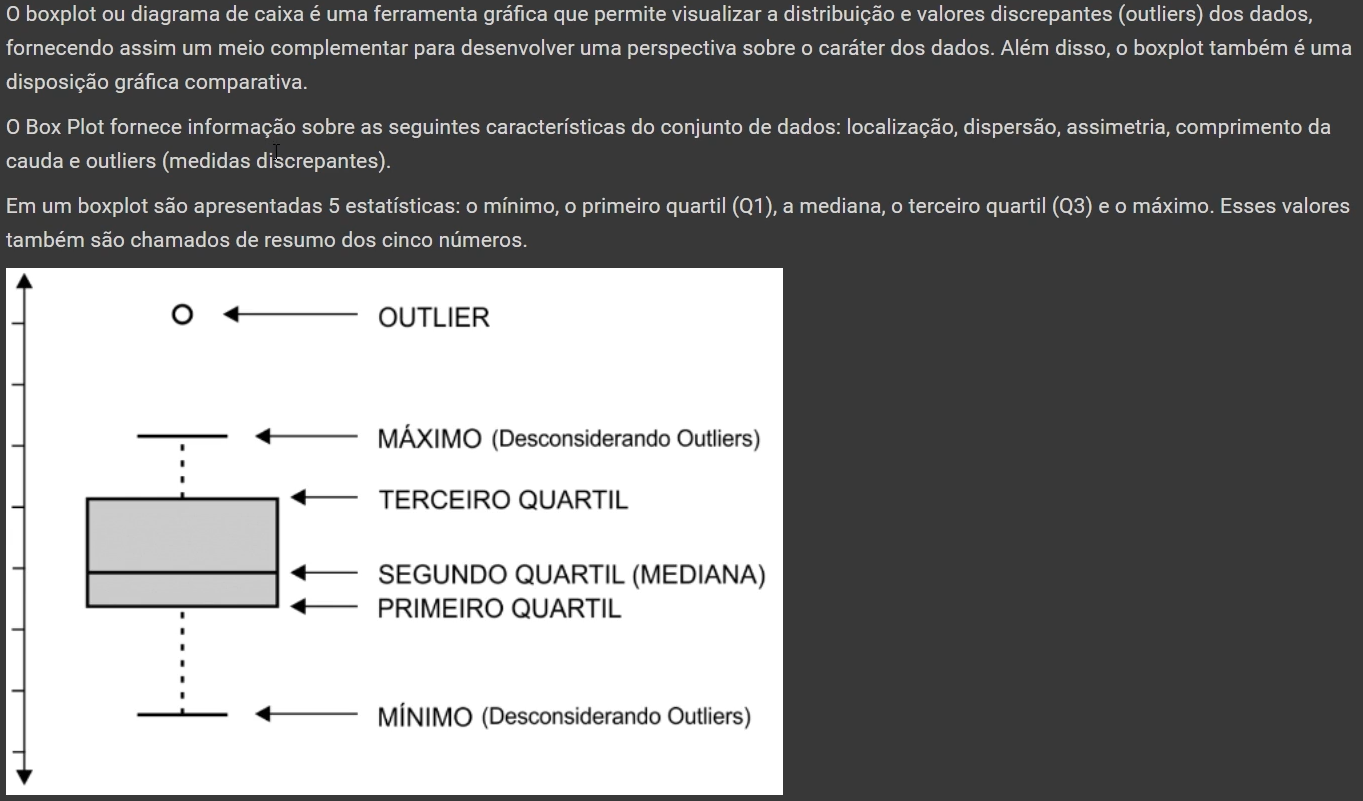

<Axes: title={'center': 'Boxplot graphic for clients age'}, xlabel='idade'>

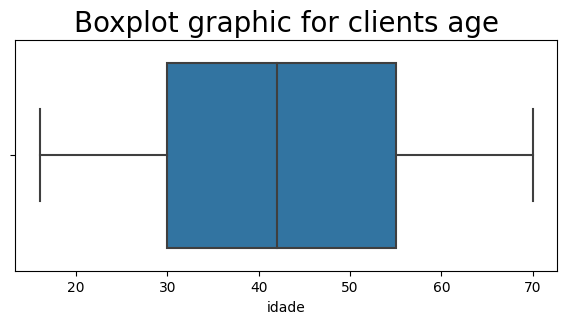

In [42]:
# Creating boxplot for clients age
plt.figure(figsize=(7,3))
plt.title('Boxplot graphic for clients age', size=20)
sns.boxplot(x='idade', data=ages, orient='h')

<Axes: title={'center': 'Boxplot graphic for clients cholesterol'}, xlabel='colesterol'>

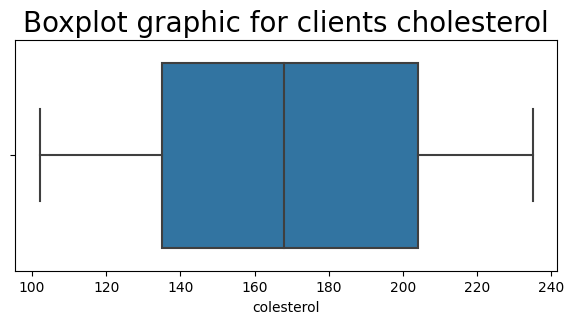

In [43]:
# Creating boxplot for clients' cholesterol
plt.figure(figsize=(7,3))
plt.title('Boxplot graphic for clients cholesterol', size=20)
sns.boxplot(x='colesterol', data=clients, orient='h')

In [47]:
clients['colesterol'].describe()

count    225.000000
mean     168.733333
std       39.413671
min      102.000000
25%      135.000000
50%      168.000000
75%      204.000000
max      235.000000
Name: colesterol, dtype: float64

<Axes: title={'center': 'Boxplot graphic for clients weight'}, xlabel='peso'>

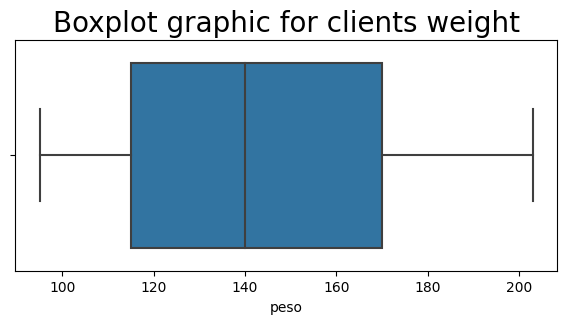

In [48]:
# Creating boxplot for clients weight
plt.figure(figsize=(7,3))
plt.title('Boxplot graphic for clients weight', size=20)
sns.boxplot(x='peso', data=clients, orient='h')

<Axes: title={'center': 'Correlation between weight and cholesterol'}>

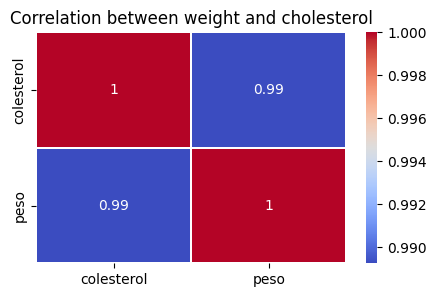

In [52]:
# Generating correlation between weight and cholesterol
plt.figure(figsize=(5,3))
plt.title('Correlation between weight and cholesterol')
data_correlation = clients[['colesterol', 'peso']]
sns.heatmap(data_correlation.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

## Enriching collected data

And performing the merge between the datasets

In [53]:
clients.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [54]:
# Creating an identifier for the gender variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
clients['id_gender'] = LE.fit_transform(clients['genero'])

In [56]:
clients.head()

,id_cliente,peso,colesterol,genero,id_estado,id_gender
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


### Merge between collected data



In [57]:
# Viewing clients data
clients[:10]

,id_cliente,peso,colesterol,genero,id_estado,id_gender
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1
7,8,145.0,176,Feminino,25,0
8,9,191.0,223,Feminino,16,0
9,10,186.0,221,Masculino,6,1


In [59]:
# Viewing states
states[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [61]:
# Merge between dataset of clients and states
clients_states = pd.merge(clients, states, on ='id_estado')
clients_states.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,id_gender,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


In [63]:
# Merge between dataset of clients_states and ages
clients_operator = pd.merge(clients_states, ages, on='id_cliente').sort_values('id_cliente')
clients_operator.head()

,id_cliente,peso,colesterol,genero,id_estado,id_gender,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44


In [64]:
# Reseting the index of the created dataset
clients_operator.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,id_gender,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


## Organizing the database

In [65]:
clients_operator[:3]

,id_cliente,peso,colesterol,genero,id_estado,id_gender,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62


### Changing column names

In [68]:
clients_operator.rename(columns={'id_cliente' : 'cod_client', 'peso': 'weight', 'colesterol': 'cholesterol', 'genero': 'gender', 'id_estado': 'id_state', 'id_genero': 'id_gender', 'estado': 'state', 'pais': 'country', 'idade': 'age'}, inplace=True)
clients_operator

,cod_client,weight,cholesterol,gender,id_state,id_gender,state,sigla_estado,country,age
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


### Changing variable content "sigla_estado"

In [69]:
clients_operator.sigla_estado.str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [71]:
clients_operator['sigla_estado'] = clients_operator.sigla_estado.str.upper()
clients_operator.head()

,cod_client,weight,cholesterol,gender,id_state,id_gender,state,sigla_estado,country,age
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44


### Changing the column layout of the data file

In [73]:
collum_order = ['cod_client', 'gender', 'age', 'weight', 'cholesterol', 'id_state', 'state', 'sigla_estado']
clients_operator[collum_order]

,cod_client,gender,age,weight,cholesterol,id_state,state,sigla_estado
0,1,Masculino,17,102.0,111,23,Roraima,RR
9,2,Masculino,28,115.0,135,7,Distrito Federal,DF
21,3,Masculino,62,115.0,136,4,Amazonas,AM
32,4,Feminino,55,140.0,167,24,Santa Catarina,SC
39,5,Masculino,44,130.0,158,26,Sergipe,SE
...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN
126,222,Feminino,38,116.0,138,15,Paraíba,PB
196,223,Feminino,24,144.0,169,18,Piauí,PI
77,224,Masculino,31,102.0,116,6,Ceará,CE


In [74]:
clients_operator = clients_operator[collum_order].reset_index(drop=True)

In [75]:
clients_operator

,cod_client,gender,age,weight,cholesterol,id_state,state,sigla_estado
0,1,Masculino,17,102.0,111,23,Roraima,RR
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF
2,3,Masculino,62,115.0,136,4,Amazonas,AM
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC
4,5,Masculino,44,130.0,158,26,Sergipe,SE
...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN
221,222,Feminino,38,116.0,138,15,Paraíba,PB
222,223,Feminino,24,144.0,169,18,Piauí,PI
223,224,Masculino,31,102.0,116,6,Ceará,CE


## Application of the Machine Learning model

### Applying the elbow method
Let's start by visualizing the number of clusters needed to perform the grouping

In [76]:
from sklearn.cluster import KMeans

In [81]:
# Creating function to calculate the WCSS
def calculate_wcss(data_client):
  wcss = []
  for k in range (1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=data_client)
    wcss.append(kmeans.inertia_)
  return wcss

In [78]:
# Creating data_client with th variables weight, cholesterol and age
date_clients = clients_operator[['weight', 'cholesterol', 'age']]
date_clients.head()

,weight,cholesterol,age
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44


In [82]:
# Calculating wcss with data_client
wcss_clients = calculate_wcss(date_clients)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [83]:
# Viewing data WCSS
for i in range(len(wcss_clients)):
  print(f'Cluster {i+1} - Value of WCSS: {wcss_clients[i]}')

Cluster 1 - Value of WCSS: 615755.6435484447
Cluster 2 - Value of WCSS: 189212.54409773235
Cluster 3 - Value of WCSS: 110985.62659521378
Cluster 4 - Value of WCSS: 85993.49644839708
Cluster 5 - Value of WCSS: 72765.0926995486
Cluster 6 - Value of WCSS: 60402.61567119764
Cluster 7 - Value of WCSS: 49363.864657354534
Cluster 8 - Value of WCSS: 42246.69687529805
Cluster 9 - Value of WCSS: 36793.297727438636
Cluster 10 - Value of WCSS: 31628.83439189302


### Viewing the elbow graphic

In [84]:
graphic_wcss = px.line(x = range(1,11),
                       y = wcss_clients
                       )
fig = go.Figure(graphic_wcss)

fig.update_layout(title = 'Calculating the WCSS',
                  title_x = 0.5,
                  xaxis_title = 'Number of cluster',
                  yaxis_title = 'Value of WCSS',
                  template = 'plotly_white'
                  )
fig.show()

### Creating grouping per each client
In this step, we are going to create a new column with the name of the cluster that the algorithm classified the operator's client

In [85]:
# Applying the algoritm K-means
kmeans_clients = KMeans(n_clusters = 3, random_state=0)
clients_operator['cluster'] = kmeans_clients.fit_predict(date_clients)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [87]:
# Viewing date
clients_operator.tail()

,cod_client,gender,age,weight,cholesterol,id_state,state,sigla_estado,cluster
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0
221,222,Feminino,38,116.0,138,15,Paraíba,PB,1
222,223,Feminino,24,144.0,169,18,Piauí,PI,2
223,224,Masculino,31,102.0,116,6,Ceará,CE,1
224,225,Masculino,57,176.0,212,7,Distrito Federal,DF,0


### Viewing the centroids of each cluster

In [90]:
date_clients[:3]

,weight,cholesterol,age
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62


In [88]:
centroids_clusters = kmeans_clients.cluster_centers_
centroids_clusters

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

### Viewing the Clusters graphic


In [91]:
graphic = px.scatter(x = clients_operator['weight'],
                     y = clients_operator['cholesterol'],
                     color = clients_operator['cluster']
                    )

graphic_centroids = px. scatter (x = centroids_clusters[:,0], y = centroids_clusters[:,1], size = [7,7,7])
fig = go.Figure(data = graphic.data + graphic_centroids.data)
fig.update_layout(title = 'Cluster Analysis',
                  xaxis_title = 'Weight',
                  yaxis_title = 'Cholesterol',
                  )
fig.show()

## Creating fuctions to generate graphics

In [92]:
def create_graphic(x, y, xlabel, ylabel):
  graphic = px.scatter(x = x, 
                       y = y, 
                       color = clients_operator['cluster']
                       )
  
  fig = go.Figure(graphic)
  fig.update_layout(title = 'Cluster Analysis',
                    xaxis_title = xlabel,
                    yaxis_title = ylabel,
                    )
  fig.show()

In [93]:
create_graphic(clients_operator['cholesterol'], clients_operator['weight'], 'cholesterol', 'weight')

In [94]:
create_graphic(clients_operator['weight'], clients_operator['cholesterol'], 'weight', 'cholesterol')

In [95]:
create_graphic(clients_operator['age'], clients_operator['cholesterol'], 'age', 'cholesterol')

In [96]:
create_graphic(clients_operator['age'], clients_operator['weight'], 'age', 'weight')

## Analyzing the generated data

### Segmenting customers based on cluster analysis
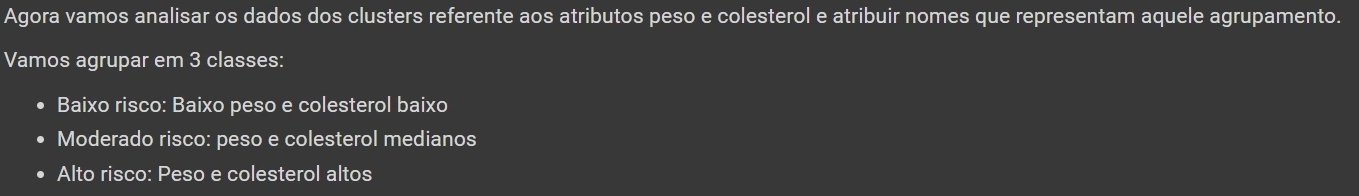

In [98]:
# Generating cluster analysis graph
x = 'cholesterol'
y = 'weight'

create_graphic(clients_operator[x], clients_operator[y], x, y)

In [100]:
# Make a copy of customer data
cluster_clients = clients_operator

In [101]:
# Segmenting customers based on cluster analysis
cluster_clients.loc[cluster_clients['cluster']==1, 'name_cluster'] = 'Low risk'
cluster_clients.loc[cluster_clients['cluster']==2, 'name_cluster'] = 'Medium risk'
cluster_clients.loc[cluster_clients['cluster']==0, 'name_cluster'] = 'High risk'

In [102]:
cluster_clients

,cod_client,gender,age,weight,cholesterol,id_state,state,sigla_estado,cluster,name_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,1,Low risk
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,1,Low risk
2,3,Masculino,62,115.0,136,4,Amazonas,AM,1,Low risk
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,2,Medium risk
4,5,Masculino,44,130.0,158,26,Sergipe,SE,2,Medium risk
...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0,High risk
221,222,Feminino,38,116.0,138,15,Paraíba,PB,1,Low risk
222,223,Feminino,24,144.0,169,18,Piauí,PI,2,Medium risk
223,224,Masculino,31,102.0,116,6,Ceará,CE,1,Low risk


### Creating graphical analyzes

<Axes: title={'center': 'Graphic of Boxplot'}, xlabel='cholesterol', ylabel='state'>

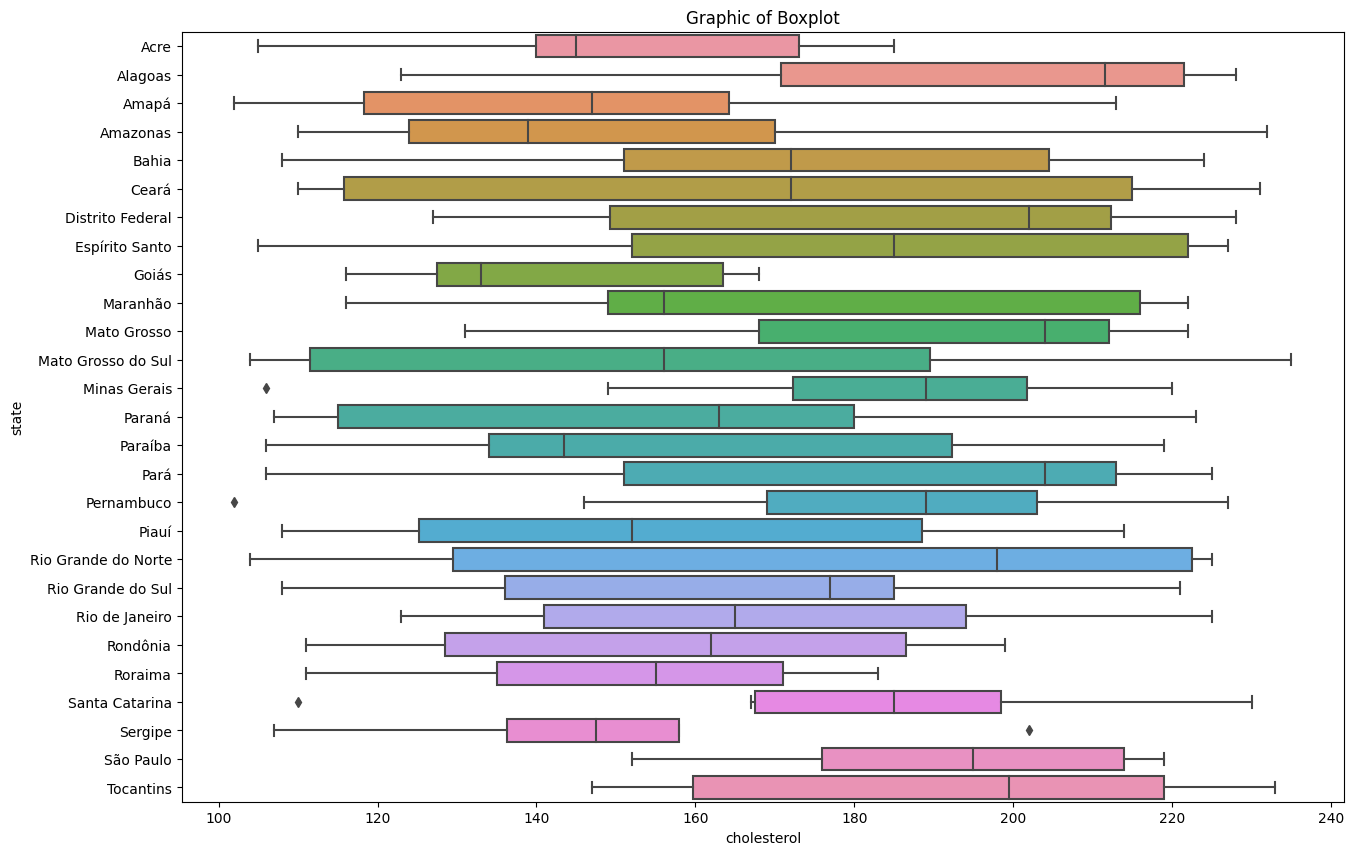

In [105]:
# Creating a boxplot graph of the distribution of cholesterol per state
plt.figure(figsize=(15,10))
plt.title('Graphic of Boxplot')
sns.boxplot (x='cholesterol', y='state', data=cluster_clients.sort_values('state'), orient='h')

<Axes: title={'center': 'Graphic of Boxplot'}, xlabel='weight', ylabel='state'>

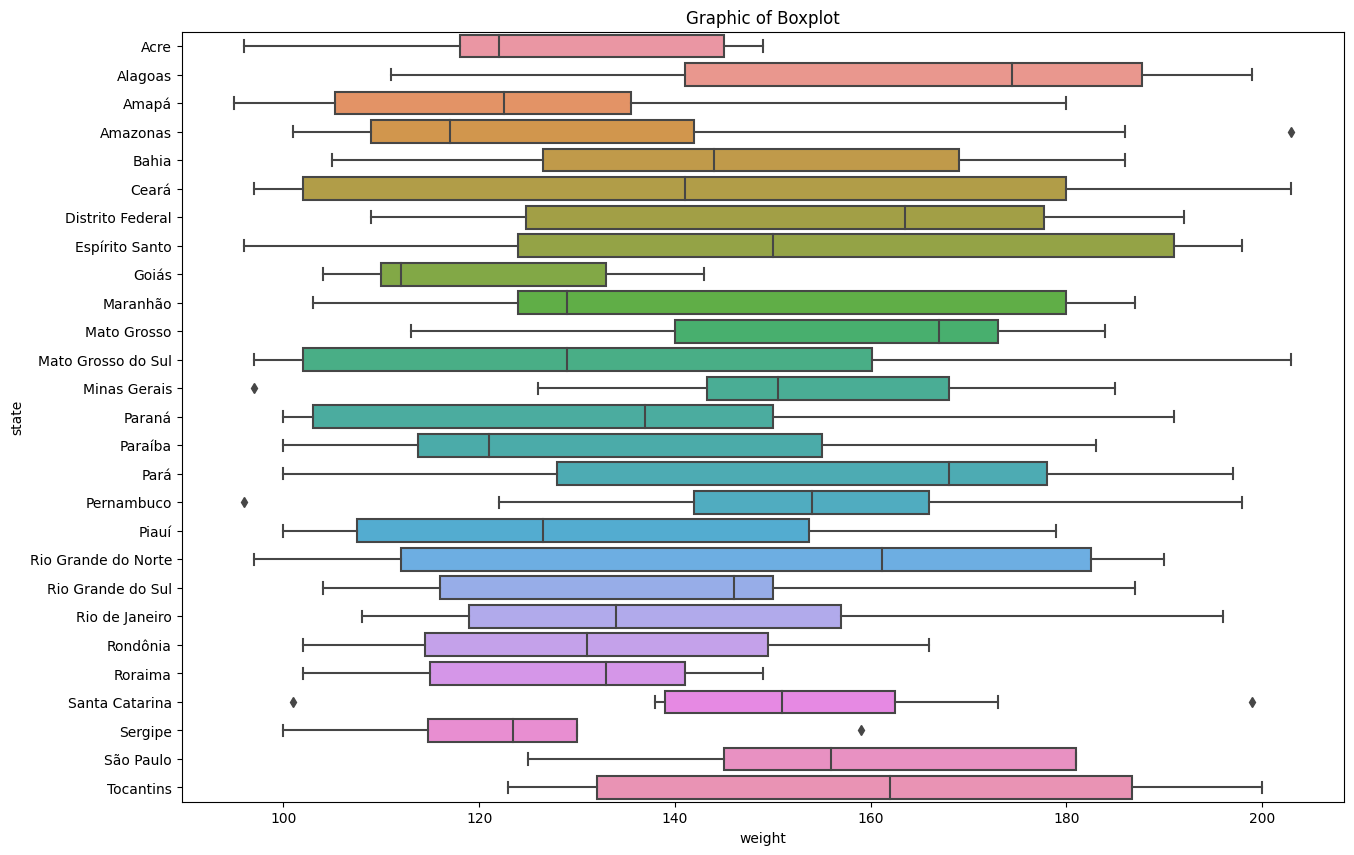

In [106]:
# Creating a boxplot graph of the distribution of weight per state
plt.figure(figsize=(15,10))
plt.title('Graphic of Boxplot')
sns.boxplot (x='weight', y='state', data=cluster_clients.sort_values('state'), orient='h')

<Axes: title={'center': 'Graphic of Boxplot'}, xlabel='cholesterol', ylabel='name_cluster'>

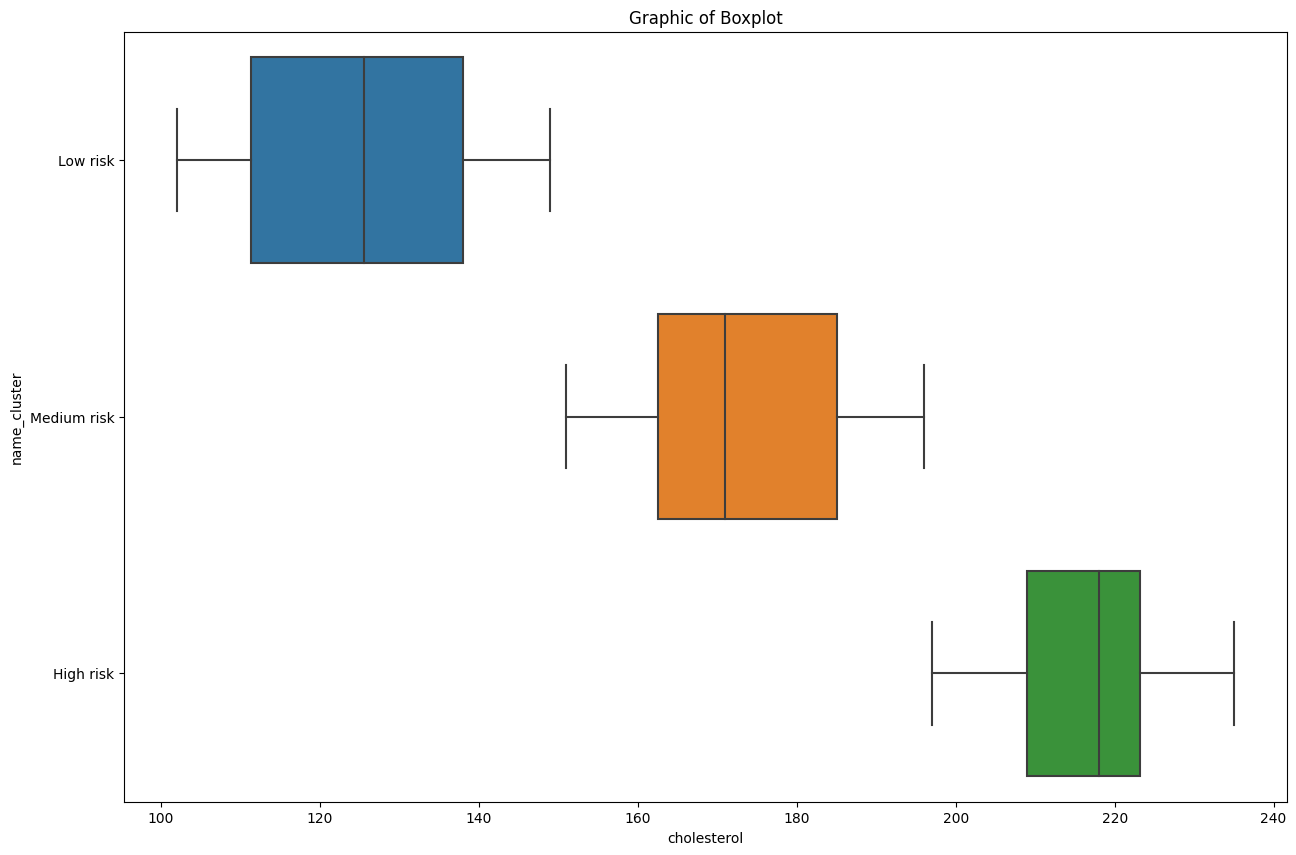

In [108]:
# Creating a boxplot graph of cholesterol per cluster
plt.figure(figsize=(15,10))
plt.title('Graphic of Boxplot')
sns.boxplot (x='cholesterol', y='name_cluster', data=cluster_clients, orient='h')

<Axes: title={'center': 'Graphic of Boxplot'}, xlabel='weight', ylabel='name_cluster'>

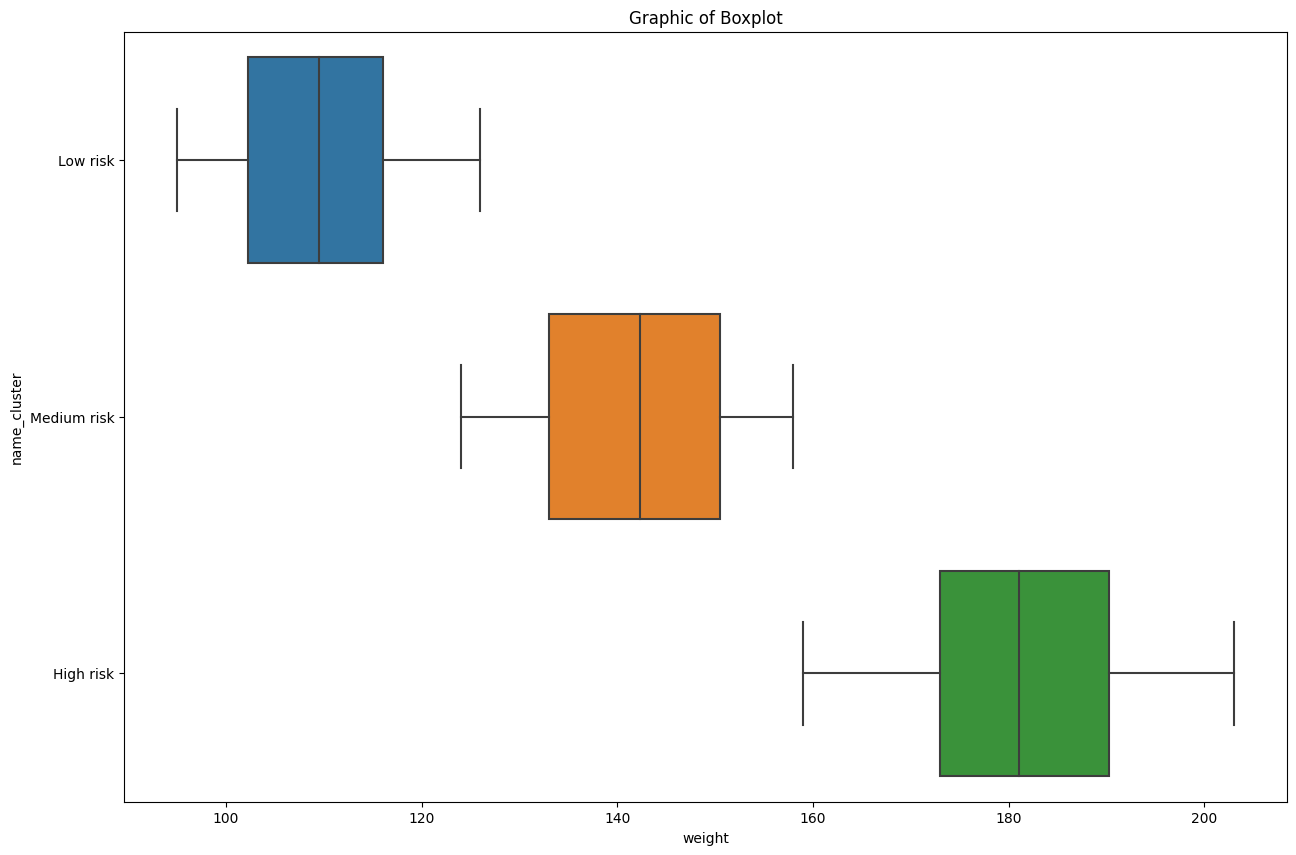

In [109]:
# Creating a boxplot graph of weight per cluster
plt.figure(figsize=(15,10))
plt.title('Graphic of Boxplot')
sns.boxplot (x='weight', y='name_cluster', data=cluster_clients, orient='h')

<Axes: title={'center': 'Graphic of Boxplot'}, xlabel='age', ylabel='name_cluster'>

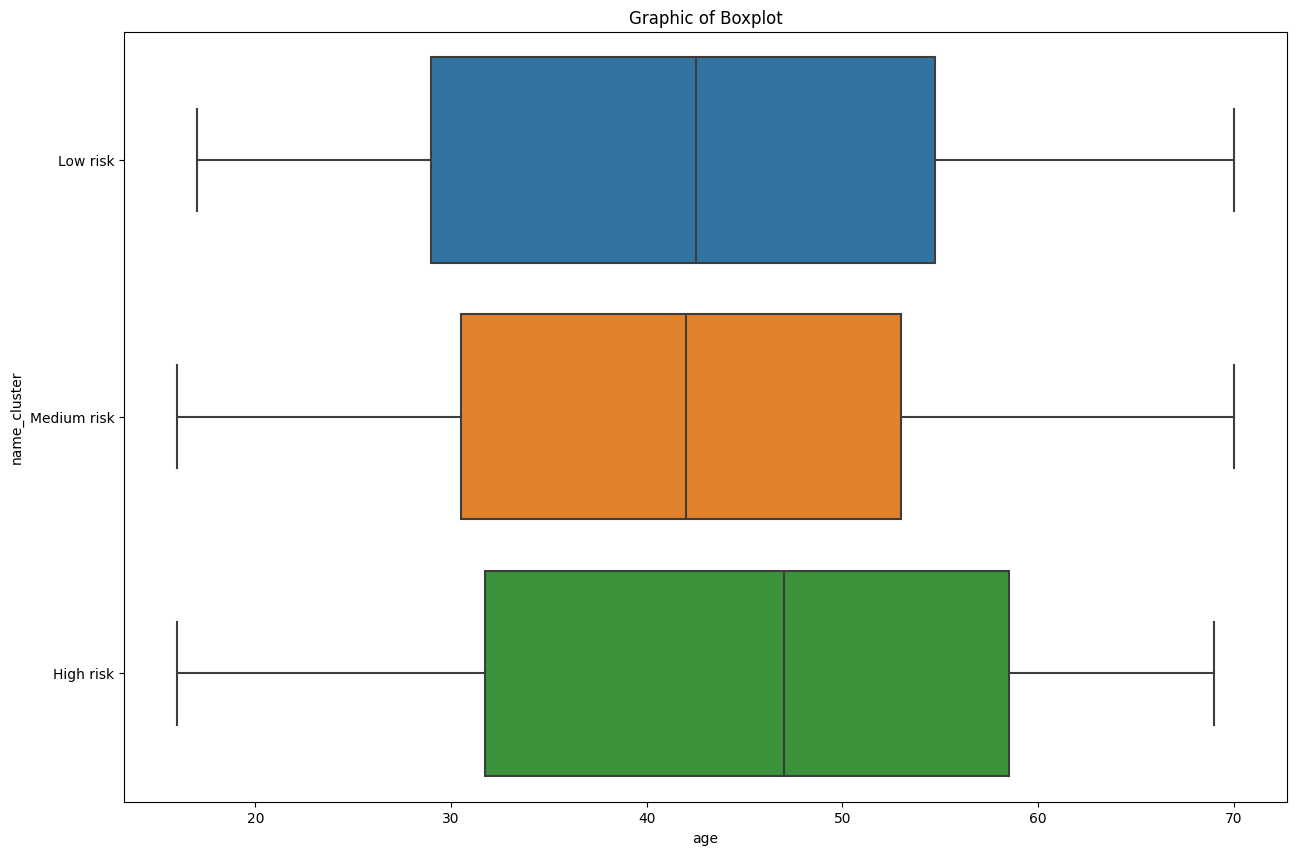

In [110]:
# Creating a boxplot graph of age per cluster
plt.figure(figsize=(15,10))
plt.title('Graphic of Boxplot')
sns.boxplot (x='age', y='name_cluster', data=cluster_clients, orient='h')

### Analysis of the clusters created


In [113]:
# Grouping cluster data by gender
cluster_clients.groupby(['name_cluster', 'gender'], as_index=False).agg(total=('gender', 'count'))

,name_cluster,gender,total
0,High risk,Feminino,28
1,High risk,Masculino,40
2,Low risk,Feminino,39
3,Low risk,Masculino,43
4,Medium risk,Feminino,44
5,Medium risk,Masculino,31


In [114]:
# Average customer weights by gender, state and cluster
cluster_clients.groupby(['name_cluster', 'gender', 'state'], as_index=False).agg(total=('weight', 'mean'))

,name_cluster,gender,state,total
0,High risk,Feminino,Amazonas,164.000000
1,High risk,Feminino,Bahia,185.500000
2,High risk,Feminino,Ceará,177.000000
3,High risk,Feminino,Distrito Federal,181.666667
4,High risk,Feminino,Espírito Santo,193.000000
...,...,...,...,...
111,Medium risk,Masculino,Rio de Janeiro,141.000000
112,Medium risk,Masculino,Rondônia,139.440000
113,Medium risk,Masculino,Roraima,145.333333
114,Medium risk,Masculino,Santa Catarina,151.500000


In [120]:
# Create new dataframe with average weights
mean_weight = cluster_clients.groupby(['name_cluster', 'gender', 'state'], as_index=False).agg(mean=('weight', 'mean'))

<ipython-input-122-692b64913aa8>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: title={'center': 'Distribuição das médias por cluster'}, xlabel='name_cluster', ylabel='mean'>

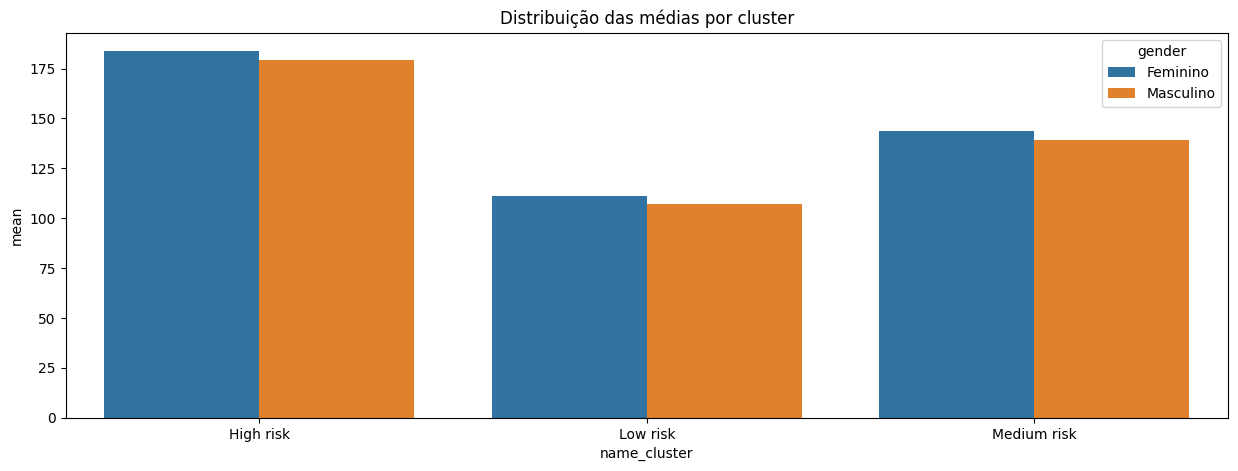

In [122]:
# Create a bar chart with average weights per cluster
plt.figure(figsize=(15,5))
plt.title('Distribuição das médias por cluster')
sns.barplot(x='name_cluster', y='mean', data=mean_weight, hue='gender', ci=None)
# hue é legenda e ci é para não mostrar as médias

In [124]:
# Check age values per cluster
cluster_clients.groupby('name_cluster')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
name_cluster,,,,,,,,
High risk,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0
Low risk,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Medium risk,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0


In [125]:
# Check state values per cluster
cluster_clients.groupby('name_cluster')['state'].describe()

,count,unique,top,freq
name_cluster,,,,
High risk,68,24,Distrito Federal,6
Low risk,82,26,Amazonas,8
Medium risk,75,26,Roraima,5


In [127]:
# Viewing data from High-risk clients
cluster_clients.query('name_cluster=="High risk" and state=="Distrito Federal"')

,cod_client,gender,age,weight,cholesterol,id_state,state,sigla_estado,cluster,name_cluster
46,47,Masculino,68,183.0,218,7,Distrito Federal,DF,0,High risk
57,58,Feminino,39,170.0,208,7,Distrito Federal,DF,0,High risk
123,124,Feminino,28,192.0,228,7,Distrito Federal,DF,0,High risk
130,131,Feminino,21,183.0,213,7,Distrito Federal,DF,0,High risk
132,133,Masculino,69,173.0,208,7,Distrito Federal,DF,0,High risk
224,225,Masculino,57,176.0,212,7,Distrito Federal,DF,0,High risk


In [129]:
# Performing grouping by cluster number and gender/weight
cluster_clients.groupby(['name_cluster', 'gender'])['weight'].describe()

count        mean        std    min     25%     50%  \
name_cluster gender                                                           
High risk    Feminino    28.0  183.571429  10.318730  161.0  178.00  185.00   
             Masculino   40.0  180.700000  11.688697  159.0  172.50  179.00   
Low risk     Feminino    39.0  111.153846   8.692218   96.0  106.00  112.00   
             Masculino   43.0  108.558140   8.511343   95.0  102.00  106.00   
Medium risk  Feminino    44.0  142.825455  10.115751  124.0  134.75  142.00   
             Masculino   31.0  140.827097  10.087216  124.0  130.50  142.32   

                           75%    max  
name_cluster gender                    
High risk    Feminino   191.00  203.0  
             Masculino  187.25  203.0  
Low risk     Feminino   118.00  126.0  
             Masculino  115.50  124.0  
Medium risk  Feminino   153.25  158.0  
             Masculino  149.50  157.0

## Exporting Data

In [131]:
cluster_clients.to_csv('classification_clients_cluster.csv', sep=';', encoding='latin-1')